In [1]:
import platform
import pandas as pd
import numpy as np
from glob import glob

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
import utils
import models


Tensorflow version : 2.10.1

Tensorflow devices available : 
 [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3167730454879211143
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22672310272
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8468114776510979279
physical_device_desc: "device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, compute capability: 8.6"
xla_global_id: 416903419
]

Tensorflow physical devices available : 
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
# Directory where the preprocessed volumetric data is located
kneemri_preprocessed_data_dir = 'Preprocessed_Data/KneeMRI'
# path to metadata csv file
kneemri_metadata_csv_path = 'Data/KneeMRI/metadata.csv'
kneemri_aug_metadata_csv_path = 'Data/KneeMRI/metadata-aug.csv'

In [10]:
# For running code on Windows
if platform.system() == "Windows":
    kneemri_preprocessed_data_dir = kneemri_preprocessed_data_dir.replace('/', '\\')
    kneemri_metadata_csv_path = kneemri_metadata_csv_path.replace('/', '\\')
    kneemri_aug_metadata_csv_path = kneemri_aug_metadata_csv_path.replace('/', '\\')

In [11]:
kneemri_classes = { 0:'healthy', 1:'partially ruptured', 2:'completely ruptured'}

In [12]:
if platform.system() == "Windows":
    kneemri_vol_paths = glob(kneemri_preprocessed_data_dir+"\\vol*")
else:
    kneemri_vol_paths = glob(kneemri_preprocessed_data_dir+"/vol*")
kneemri_vol_paths.sort()

In [13]:
kneemri_vol_paths

['Preprocessed_Data\\KneeMRI\\vol01',
 'Preprocessed_Data\\KneeMRI\\vol02',
 'Preprocessed_Data\\KneeMRI\\vol03',
 'Preprocessed_Data\\KneeMRI\\vol04',
 'Preprocessed_Data\\KneeMRI\\vol05',
 'Preprocessed_Data\\KneeMRI\\vol06',
 'Preprocessed_Data\\KneeMRI\\vol07',
 'Preprocessed_Data\\KneeMRI\\vol08',
 'Preprocessed_Data\\KneeMRI\\vol09',
 'Preprocessed_Data\\KneeMRI\\vol10']

In [14]:
kneemri_cases = []
for mri_data_path in kneemri_vol_paths:
    if platform.system() == "Windows":
        all_exams = glob(mri_data_path+"\\*.npy")
    else:
        all_exams = glob(mri_data_path+"/*.npy")
    all_exams.sort()
    kneemri_cases.extend(all_exams)

In [15]:
print('Original cases : ', len(kneemri_cases))

Original cases :  917


In [16]:
kneemri_cases

['Preprocessed_Data\\KneeMRI\\vol01\\329637-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\390116-9.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\404663-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\406320-9.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\412857-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\412865-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\415102-9.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\425707-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\425713-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\437474-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\444503-7.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\451760-9.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\454319-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\455741-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\456691-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\457181-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\457491-6.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\457511-7.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\457519-6.npy',
 'Preprocess

In [17]:
kneemri_aug_cases = []
for mri_data_path in kneemri_vol_paths:
    if platform.system() == "Windows":
        all_exams = glob(mri_data_path+"\\aug\\*.npy")
    else:
        all_exams = glob(mri_data_path+"/aug/*.npy")
    all_exams.sort()
    kneemri_aug_cases.extend(all_exams)

In [18]:
print('Augmented cases : ', len(kneemri_aug_cases))

Augmented cases :  650


In [19]:
kneemri_aug_cases

['Preprocessed_Data\\KneeMRI\\vol01\\aug\\404663-8-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\404663-8-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\412857-8-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\412865-8-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\412865-8-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\451760-9-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\451760-9-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\454319-8-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\454319-8-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457511-7-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457511-7-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457519-6-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457519-6-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457531-6-aug-0.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457531-6-aug-1.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\aug\\457572-6-aug-

In [20]:
# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
kneemri_metadata = np.genfromtxt(kneemri_metadata_csv_path, delimiter=',', names=True, 
                                 dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20')

In [21]:
kneemri_metadata_df = pd.DataFrame(kneemri_metadata)

In [22]:
kneemri_metadata_df

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck
1,390116,9,0,0,113,105,10,83,98,6,390116-9.pck
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck
3,406320,9,0,0,117,124,12,91,80,3,406320-9.pck
4,412857,8,0,1,122,105,14,83,98,4,412857-8.pck
...,...,...,...,...,...,...,...,...,...,...,...
912,1027212,5,1,1,113,127,16,101,99,3,1027212-5.pck
913,1028019,5,1,1,105,102,14,95,100,3,1028019-5.pck
914,1028028,5,0,0,118,84,15,100,100,2,1028028-5.pck
915,1028069,5,0,0,105,97,15,103,106,4,1028069-5.pck


In [23]:
kneemri_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   examId          917 non-null    int32 
 1   seriesNo        917 non-null    int32 
 2   aclDiagnosis    917 non-null    int32 
 3   kneeLR          917 non-null    int32 
 4   roiX            917 non-null    int32 
 5   roiY            917 non-null    int32 
 6   roiZ            917 non-null    int32 
 7   roiHeight       917 non-null    int32 
 8   roiWidth        917 non-null    int32 
 9   roiDepth        917 non-null    int32 
 10  volumeFilename  917 non-null    object
dtypes: int32(10), object(1)
memory usage: 43.1+ KB


In [24]:
# metadata_df['examId'].nunique()

In [25]:
kneemri_metadata_df['volumeFilename'].nunique()

917

In [26]:
# metadata_df['examId'].value_counts()

In [27]:
kneemri_aug_metadata_df = pd.read_csv(kneemri_aug_metadata_csv_path, index_col=0)

In [28]:
kneemri_aug_metadata_df

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,404663,8,1,1,120,117,15,101,115,2,404663-8-aug-0.pck
1,404663,8,1,1,120,117,15,101,115,2,404663-8-aug-1.pck
2,412857,8,0,0,122,105,14,83,98,4,412857-8-aug-0.pck
3,412865,8,1,0,111,133,13,78,78,4,412865-8-aug-0.pck
4,412865,8,1,0,111,133,13,78,78,4,412865-8-aug-1.pck
...,...,...,...,...,...,...,...,...,...,...,...
645,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-1.pck
646,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-2.pck
647,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-3.pck
648,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-4.pck


In [29]:
kneemri_metadata_df[kneemri_metadata_df['examId']==584216]

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
238,584216,5,0,0,135,125,12,74,72,4,584216-5.pck
239,584216,8,0,0,133,121,11,80,88,5,584216-8.pck
240,584216,9,0,0,131,137,12,66,64,3,584216-9.pck


In [30]:
kneemri_metadata_df[kneemri_metadata_df['examId']==404663]

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck


In [31]:
kneemri_aug_metadata_df[kneemri_aug_metadata_df['examId']==404663]

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,404663,8,1,1,120,117,15,101,115,2,404663-8-aug-0.pck
1,404663,8,1,1,120,117,15,101,115,2,404663-8-aug-1.pck


In [32]:
kneemri_full_metadata_df = pd.concat([kneemri_metadata_df, kneemri_aug_metadata_df], ignore_index=True)

In [33]:
kneemri_full_metadata_df

,examId,seriesNo,aclDiagnosis,kneeLR,roiX,roiY,roiZ,roiHeight,roiWidth,roiDepth,volumeFilename
0,329637,8,0,1,139,184,14,74,72,3,329637-8.pck
1,390116,9,0,0,113,105,10,83,98,6,390116-9.pck
2,404663,8,1,1,120,117,15,101,115,2,404663-8.pck
3,406320,9,0,0,117,124,12,91,80,3,406320-9.pck
4,412857,8,0,1,122,105,14,83,98,4,412857-8.pck
...,...,...,...,...,...,...,...,...,...,...,...
1562,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-1.pck
1563,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-2.pck
1564,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-3.pck
1565,995153,5,2,1,113,122,13,93,98,3,995153-5-aug-4.pck


In [34]:
# metadata_df.loc[metadata_df['volumeFilename']=='584216-5.pck']

In [35]:
kneemri_filenames = []
kneemri_filenames.extend(kneemri_cases)
kneemri_filenames.extend(kneemri_aug_cases)
kneemri_filenames.sort()

In [36]:
print(len(kneemri_filenames))

1567


In [37]:
# label = full_metadata_df.loc[full_metadata_df['volumeFilename']=='584216-5.pck',]

In [38]:
# full_metadata_df[full_metadata_df['examId']==584216]

In [39]:
# labels = full_metadata_df['aclDiagnosis'].tolist()
kneemri_labels = utils.get_correct_labels_kneemri(kneemri_filenames, kneemri_full_metadata_df)

In [40]:
print(len(kneemri_labels))

1567


In [41]:
kneemri_filenames[:5]

['Preprocessed_Data\\KneeMRI\\vol01\\329637-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\390116-9.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\404663-8.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\406320-9.npy',
 'Preprocessed_Data\\KneeMRI\\vol01\\412857-8.npy']

In [42]:
kneemri_labels[:5]

[0, 0, 1, 0, 0]

In [43]:
BATCH_SIZE = 8
EPOCHS = 100

In [44]:
# Quick check of counts of samples for each case
[[x, kneemri_labels.count(x)] for x in set(kneemri_labels)]

[[0, 721], [1, 516], [2, 330]]

In [45]:
# Splitting into train, test and validation

X, X_test, y, y_test = train_test_split(kneemri_filenames, 
                                        kneemri_labels, 
                                        test_size=0.1, 
                                        random_state=610, 
                                        shuffle=True, 
                                        stratify=kneemri_labels)

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      train_size=0.7, 
                                                      random_state=610, 
                                                      shuffle=True, 
                                                      stratify=y)

In [46]:
print(len(X))
print(len(X_test))
print(len(y))
print(len(y_test))

1410
157
1410
157


In [47]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

986
424
986
424


In [48]:
# CASES
print(len(X_train))
print(len(X_test))
print(len(X_valid))
print(len(X_train) + len(X_test) + len(X_valid))

986
157
424
1567


In [49]:
# LABELS
print(len(y_train))
print(len(y_test))
print(len(y_valid))
print(len(y_train) + len(y_test) + len(y_valid))

986
157
424
1567


In [50]:
tf.executing_eagerly()

True

In [51]:
kneemri_class_weights = utils.compute_class_weights(y_train)

In [52]:
kneemri_class_weights

{0: 0.723935389133627, 1: 1.01440329218107, 2: 1.580128205128205}

## KneeMRI Model 1

In [53]:
model_name = 'kneeMRI_Model1'
kneeMRI_Model1 = models.mri_model_1(model_name, len(kneemri_classes))
kneeMRI_Model1.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])
kneeMRI_Model1.summary()

Model: "kneeMRI_Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 256, 256, 64)  1792      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 128, 128, 64)  0        
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 128, 128, 64)  256      
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 128, 128, 64)  110656    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 64, 64, 64)    0         
 3D)                                                             
                                                    

In [54]:
%%time
with tf.device('/device:GPU:0'):
    history = kneeMRI_Model1.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                                 steps_per_epoch=len(X_train)//BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                                 validation_steps=len(X_valid)//BATCH_SIZE, 
                                 shuffle=True,
                                 class_weight=kneemri_class_weights,
                                 verbose=1,
                                 callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
123/123 [==============================] - 164s 889ms/step - loss: 1.0721 - accuracy: 0.4441 - val_loss: 1.0866 - val_accuracy: 0.4670
Epoch 2/100
123/123 [==============================] - 106s 861ms/step - loss: 0.9903 - accuracy: 0.5244 - val_loss: 1.0270 - val_accuracy: 0.5401
Epoch 3/100
123/123 [==============================] - 106s 863ms/step - loss: 0.9391 - accuracy: 0.5620 - val_loss: 0.9238 - val_accuracy: 0.5542
Epoch 4/100
123/123 [==============================] - 106s 861ms/step - loss: 0.8830 - accuracy: 0.6067 - val_loss: 0.8299 - val_accuracy: 0.6344
Epoch 5/100
123/123 [==============================] - 106s 861ms/step - loss: 0.8521 - accuracy: 0.6138 - val_loss: 0.7622 - val_accuracy: 0.6722
Epoch 6/100
123/123 [==============================] - 106s 859ms/step - loss: 0.8072 - accuracy: 0.6260 - val_loss: 1.0764 - val_accuracy: 0.5024
Epoch 7/100
123/123 [==============================] - 106s 863ms/step - loss: 0.7602 - accuracy: 0.6768 - val_loss: 1

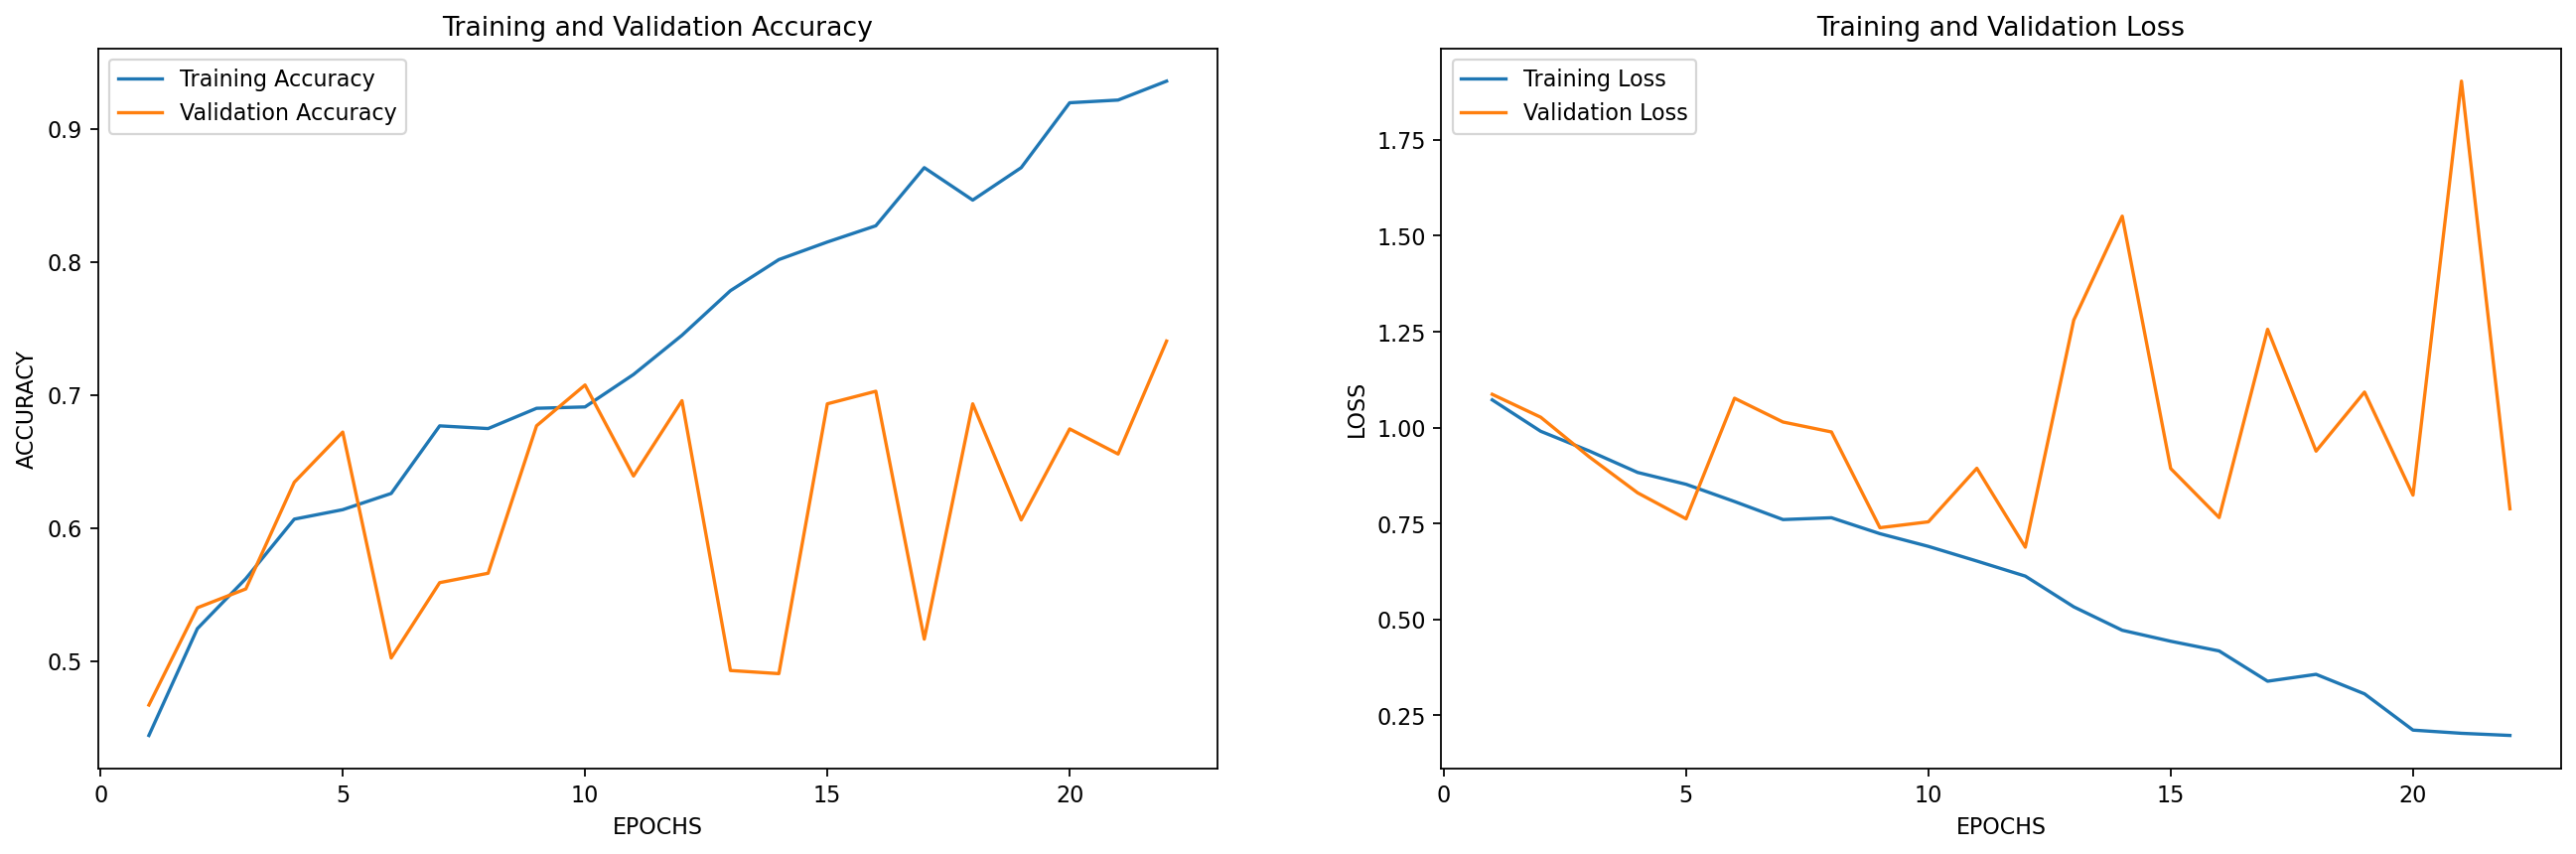

In [55]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

20/20 [==============================] - 11s 547ms/step

Evaluation Metrics:

Balanced Accuracy : 0.75
Precision : 0.78
Recall : 0.75
F1 Score: 0.75
ROC AUC Score : 0.9

Classification report : 
               precision    recall  f1-score   support

      Healthy       0.90      0.72      0.80        72
 Partial Tear       0.59      0.79      0.67        52
Complete Tear       0.83      0.73      0.77        33

     accuracy                           0.75       157
    macro avg       0.77      0.75      0.75       157
 weighted avg       0.78      0.75      0.75       157


Confusion Matrix : 


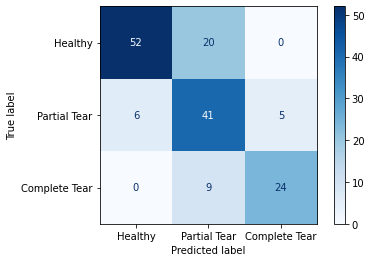

In [56]:
# Evaluate model
X_test_prob = kneeMRI_Model1.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

X_test_pred = X_test_prob.argmax(axis=-1)

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Partial Tear', 'Complete Tear'])

## KneeMRI Model 2

In [57]:
model_name = 'kneeMRI_Model2'
kneeMRI_Model2 = models.mri_model_2(model_name, len(kneemri_classes))
kneeMRI_Model2.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])
kneeMRI_Model2.summary()

Model: "kneeMRI_Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_5 (Conv3D)           (None, 30, 256, 256, 16)  448       
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 15, 128, 128, 16)  0        
 3D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 15, 128, 128, 16)  64       
 hNormalization)                                                 
                                                                 
 conv3d_6 (Conv3D)           (None, 15, 128, 128, 32)  13856     
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 8, 64, 64, 32)    0         
 3D)                                                             
                                                    

In [58]:
%%time
with tf.device('/device:GPU:0'):
    history = kneeMRI_Model2.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                                 steps_per_epoch=len(X_train)//BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                                 validation_steps=len(X_valid)//BATCH_SIZE, 
                                 shuffle=True,
                                 class_weight=kneemri_class_weights,
                                 verbose=1,
                                 callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
123/123 [==============================] - 56s 420ms/step - loss: 1.3754 - accuracy: 0.4004 - val_loss: 1.1102 - val_accuracy: 0.3302
Epoch 2/100
123/123 [==============================] - 48s 391ms/step - loss: 1.1271 - accuracy: 0.4807 - val_loss: 1.0842 - val_accuracy: 0.4245
Epoch 3/100
123/123 [==============================] - 48s 392ms/step - loss: 1.0558 - accuracy: 0.5081 - val_loss: 0.9268 - val_accuracy: 0.5613
Epoch 4/100
123/123 [==============================] - 48s 392ms/step - loss: 1.0054 - accuracy: 0.5356 - val_loss: 0.8628 - val_accuracy: 0.5825
Epoch 5/100
123/123 [==============================] - 48s 392ms/step - loss: 0.9080 - accuracy: 0.5843 - val_loss: 0.8121 - val_accuracy: 0.6132
Epoch 6/100
123/123 [==============================] - 48s 392ms/step - loss: 0.8166 - accuracy: 0.6433 - val_loss: 0.8373 - val_accuracy: 0.6014
Epoch 7/100
123/123 [==============================] - 48s 394ms/step - loss: 0.7189 - accuracy: 0.6758 - val_loss: 0.8038 -

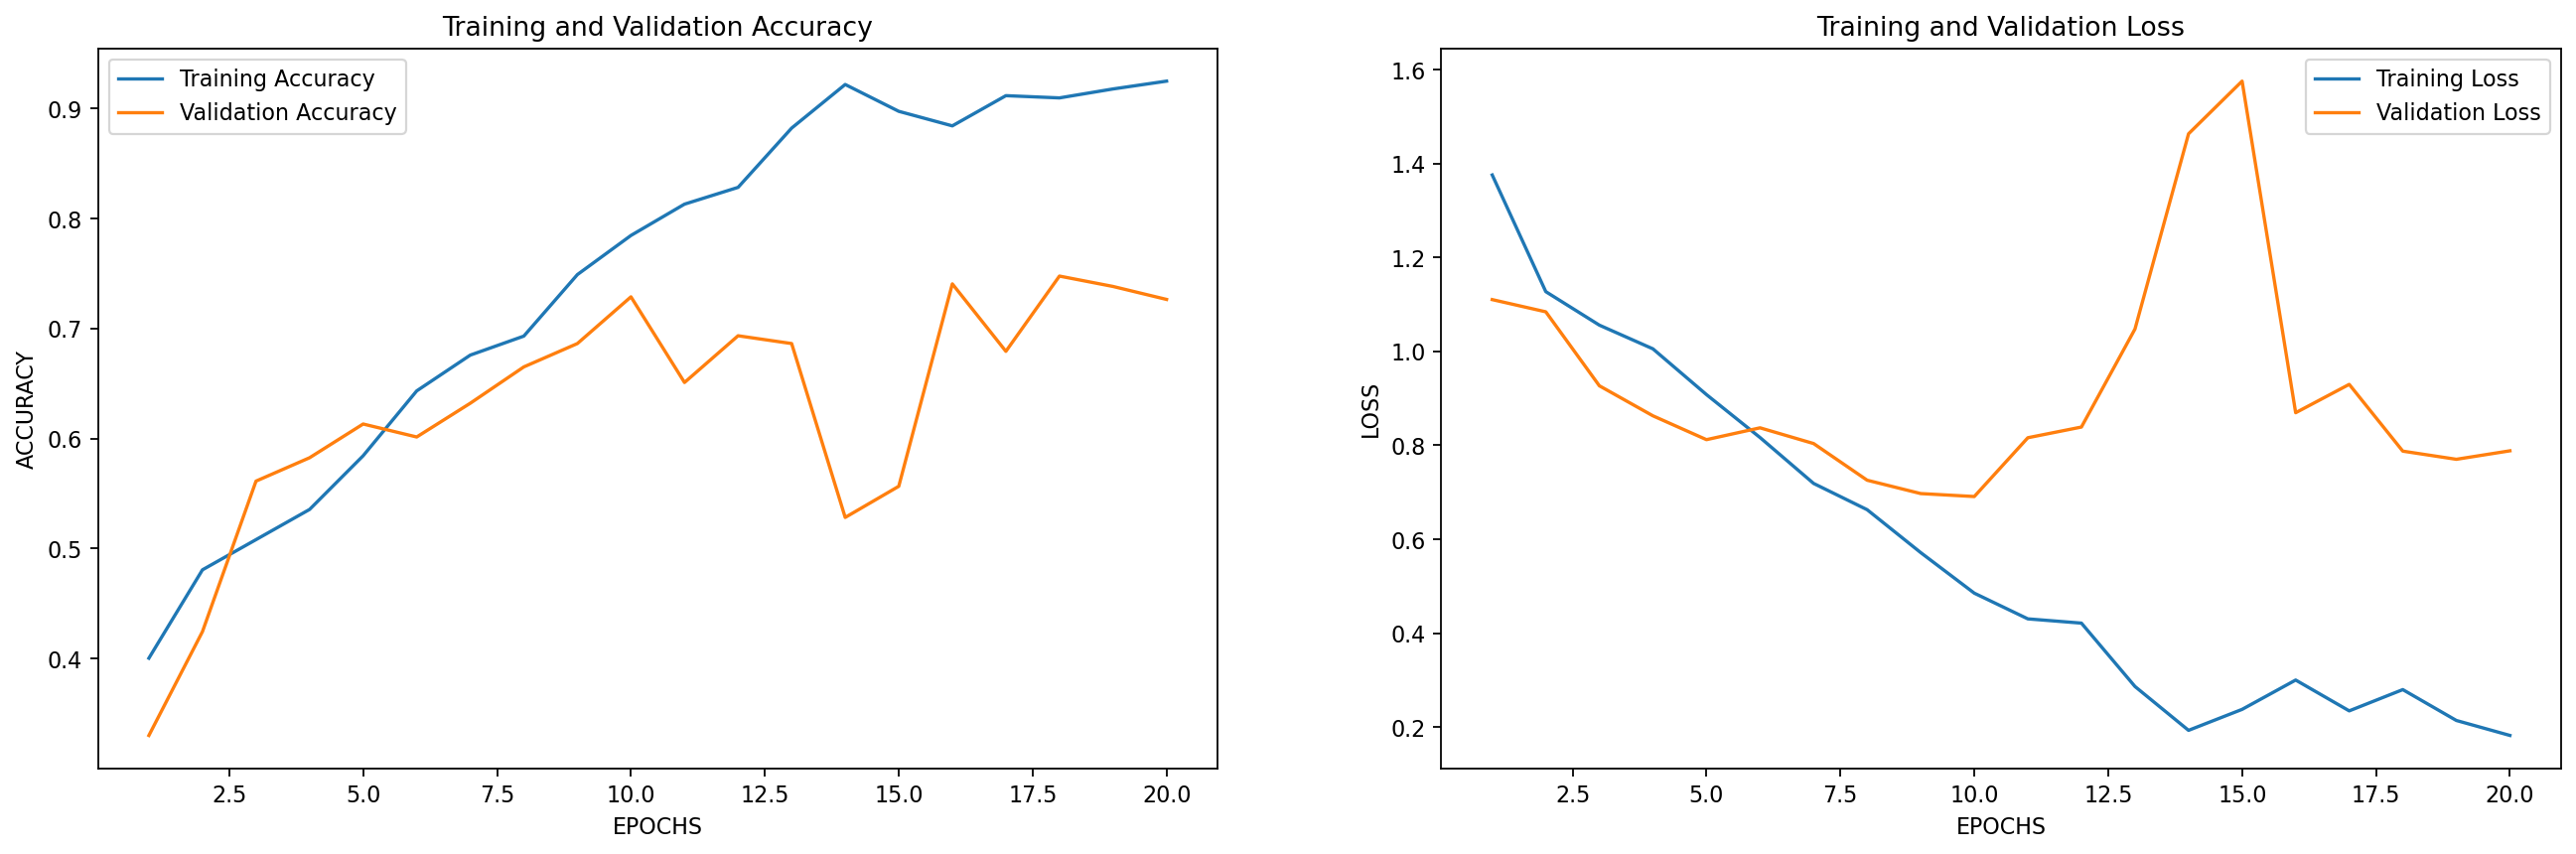

In [59]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

20/20 [==============================] - 5s 255ms/step

Evaluation Metrics:

Balanced Accuracy : 0.7
Precision : 0.72
Recall : 0.72
F1 Score: 0.72
ROC AUC Score : 0.87

Classification report : 
               precision    recall  f1-score   support

      Healthy       0.80      0.82      0.81        72
 Partial Tear       0.63      0.60      0.61        52
Complete Tear       0.68      0.70      0.69        33

     accuracy                           0.72       157
    macro avg       0.70      0.70      0.70       157
 weighted avg       0.72      0.72      0.72       157


Confusion Matrix : 


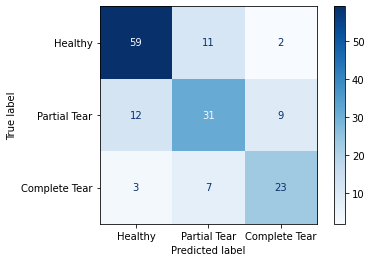

In [60]:
# Evaluate model
X_test_prob = kneeMRI_Model2.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

X_test_pred = X_test_prob.argmax(axis=-1)

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Partial Tear', 'Complete Tear'])

## KneeMRI Model 3

In [61]:
model_name = 'kneeMRI_Model3'
kneeMRI_Model3 = models.mri_model_3(model_name, len(kneemri_classes))
kneeMRI_Model3.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])
kneeMRI_Model3.summary()

Model: "kneeMRI_Model3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_13 (Conv3D)          (None, 30, 256, 256, 32)  896       
                                                                 
 max_pooling3d_13 (MaxPoolin  (None, 15, 128, 128, 32)  0        
 g3D)                                                            
                                                                 
 batch_normalization_13 (Bat  (None, 15, 128, 128, 32)  128      
 chNormalization)                                                
                                                                 
 conv3d_14 (Conv3D)          (None, 15, 128, 128, 32)  27680     
                                                                 
 max_pooling3d_14 (MaxPoolin  (None, 8, 64, 64, 32)    0         
 g3D)                                                            
                                                    

In [62]:
%%time
with tf.device('/device:GPU:0'):
    history = kneeMRI_Model3.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                                 steps_per_epoch=len(X_train)//BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                                 validation_steps=len(X_valid)//BATCH_SIZE, 
                                 shuffle=True,
                                 class_weight=kneemri_class_weights,
                                 verbose=1,
                                 callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
123/123 [==============================] - 70s 506ms/step - loss: 1.3134 - accuracy: 0.3648 - val_loss: 1.1139 - val_accuracy: 0.2099
Epoch 2/100
123/123 [==============================] - 59s 479ms/step - loss: 1.2042 - accuracy: 0.3791 - val_loss: 1.1148 - val_accuracy: 0.2241
Epoch 3/100
123/123 [==============================] - 59s 480ms/step - loss: 1.1494 - accuracy: 0.4228 - val_loss: 1.0978 - val_accuracy: 0.3160
Epoch 4/100
123/123 [==============================] - 59s 483ms/step - loss: 1.1123 - accuracy: 0.4278 - val_loss: 1.0534 - val_accuracy: 0.3703
Epoch 5/100
123/123 [==============================] - 59s 480ms/step - loss: 1.0407 - accuracy: 0.4583 - val_loss: 0.9555 - val_accuracy: 0.5071
Epoch 6/100
123/123 [==============================] - 59s 479ms/step - loss: 0.9900 - accuracy: 0.5041 - val_loss: 0.9588 - val_accuracy: 0.5377
Epoch 7/100
123/123 [==============================] - 59s 481ms/step - loss: 0.9775 - accuracy: 0.5132 - val_loss: 0.9359 -

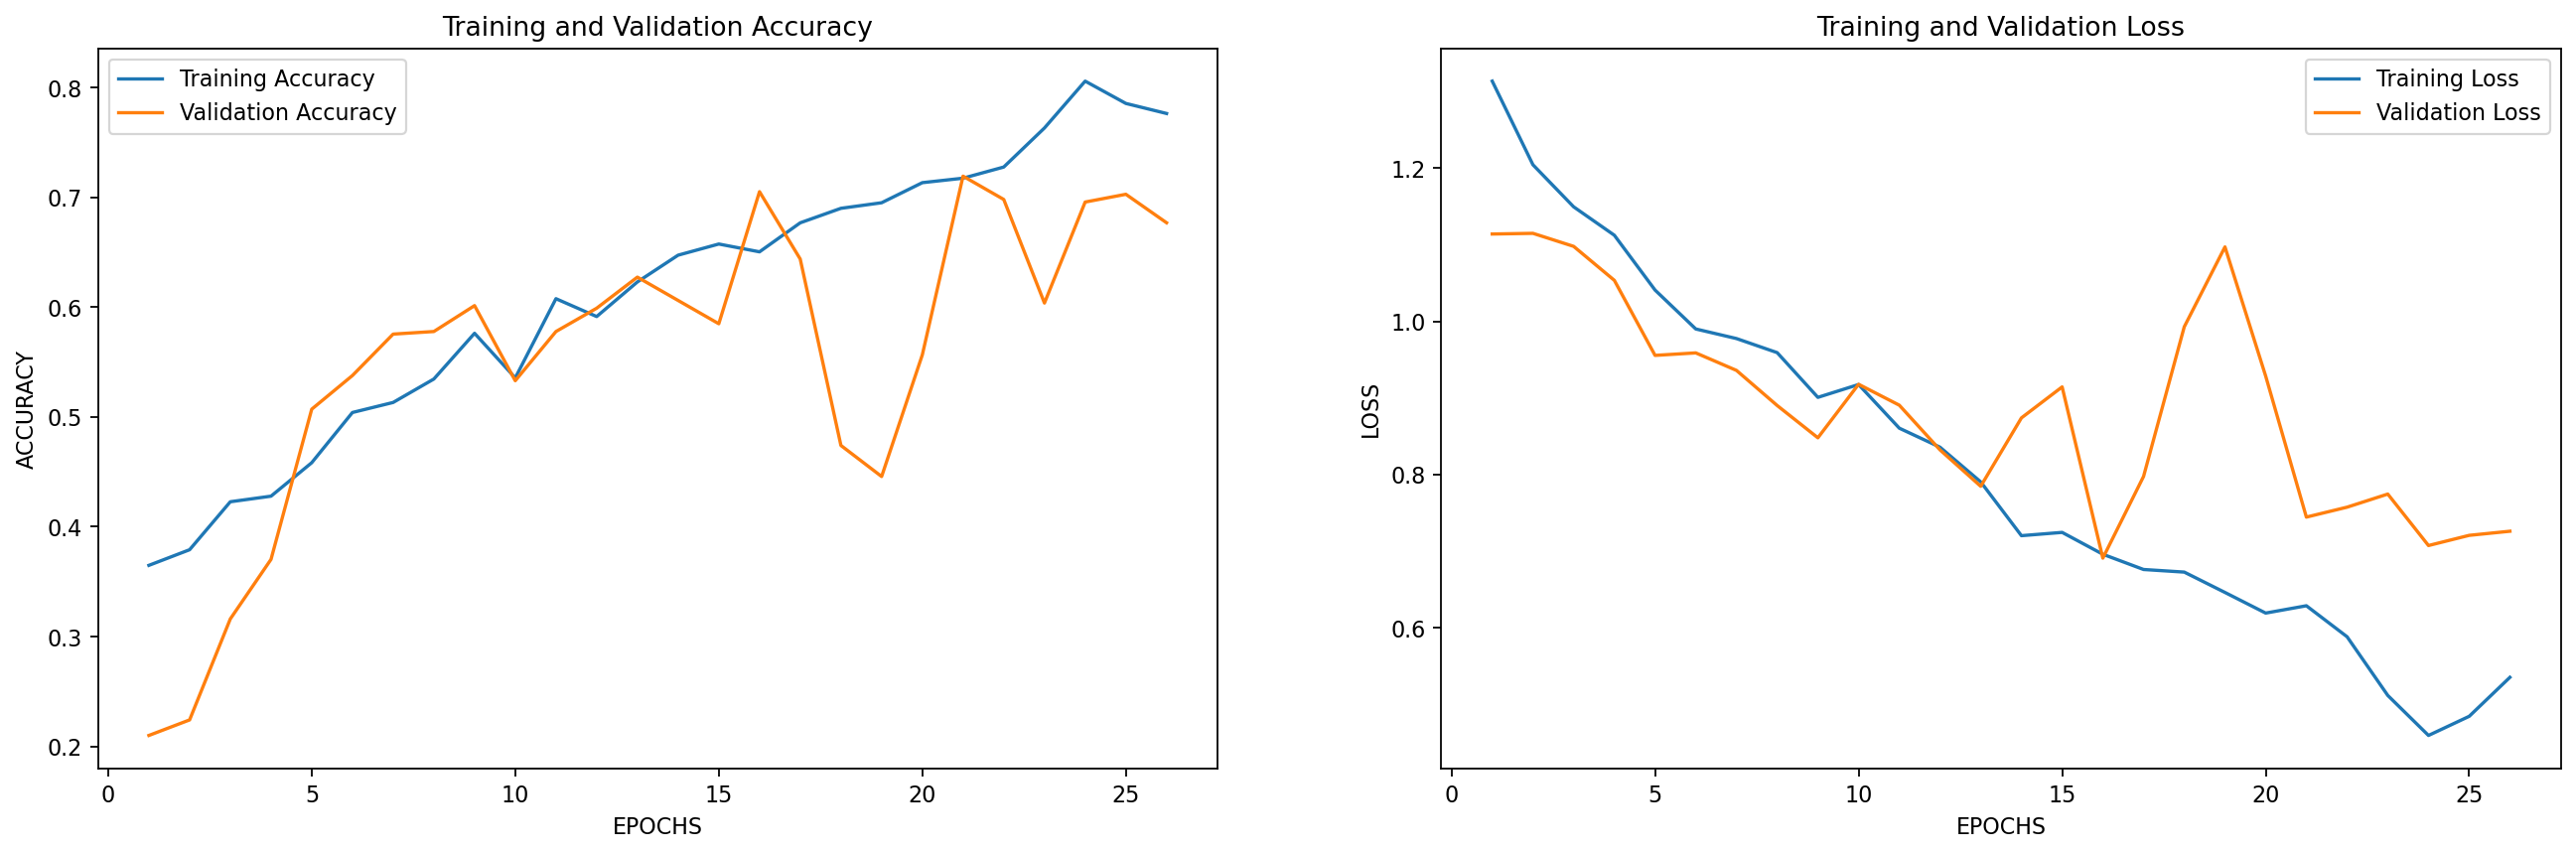

In [63]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

20/20 [==============================] - 5s 260ms/step

Evaluation Metrics:

Balanced Accuracy : 0.67
Precision : 0.69
Recall : 0.68
F1 Score: 0.69
ROC AUC Score : 0.85

Classification report : 
               precision    recall  f1-score   support

      Healthy       0.83      0.75      0.79        72
 Partial Tear       0.57      0.58      0.57        52
Complete Tear       0.59      0.70      0.64        33

     accuracy                           0.68       157
    macro avg       0.66      0.67      0.67       157
 weighted avg       0.69      0.68      0.69       157


Confusion Matrix : 


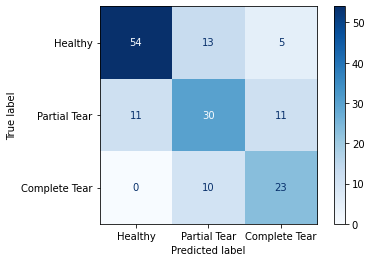

In [64]:
# Evaluate model
X_test_prob = kneeMRI_Model3.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

X_test_pred = X_test_prob.argmax(axis=-1)

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Partial Tear', 'Complete Tear'])

## KneeMRI Model 4

In [65]:
model_name = 'kneeMRI_Model4'
kneeMRI_Model4 = models.mri_model_4(model_name, len(kneemri_classes))
kneeMRI_Model4.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])
kneeMRI_Model4.summary()

Model: "kneeMRI_Model4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_24 (Conv3D)          (None, 30, 256, 256, 32)  896       
                                                                 
 conv3d_25 (Conv3D)          (None, 30, 256, 256, 32)  27680     
                                                                 
 max_pooling3d_24 (MaxPoolin  (None, 15, 128, 128, 32)  0        
 g3D)                                                            
                                                                 
 conv3d_26 (Conv3D)          (None, 15, 128, 128, 32)  27680     
                                                                 
 conv3d_27 (Conv3D)          (None, 15, 128, 128, 64)  55360     
                                                                 
 max_pooling3d_25 (MaxPoolin  (None, 8, 64, 64, 64)    0         
 g3D)                                               

In [66]:
%%time
with tf.device('/device:GPU:0'):
    history = kneeMRI_Model4.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                                 steps_per_epoch=len(X_train)//BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                                 validation_steps=len(X_valid)//BATCH_SIZE, 
                                 shuffle=True,
                                 class_weight=kneemri_class_weights,
                                 verbose=1,
                                 callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
123/123 [==============================] - 235s 1s/step - loss: 1.1088 - accuracy: 0.4177 - val_loss: 1.0836 - val_accuracy: 0.5165
Epoch 2/100
123/123 [==============================] - 162s 1s/step - loss: 1.0869 - accuracy: 0.4441 - val_loss: 1.0503 - val_accuracy: 0.4646
Epoch 3/100
123/123 [==============================] - 161s 1s/step - loss: 1.0441 - accuracy: 0.5000 - val_loss: 0.9830 - val_accuracy: 0.5401
Epoch 4/100
123/123 [==============================] - 161s 1s/step - loss: 0.9712 - accuracy: 0.5457 - val_loss: 0.8635 - val_accuracy: 0.5873
Epoch 5/100
123/123 [==============================] - 161s 1s/step - loss: 0.9334 - accuracy: 0.5864 - val_loss: 0.8201 - val_accuracy: 0.6132
Epoch 6/100
123/123 [==============================] - 157s 1s/step - loss: 0.8556 - accuracy: 0.6250 - val_loss: 0.8555 - val_accuracy: 0.6179
Epoch 7/100
123/123 [==============================] - 160s 1s/step - loss: 0.8233 - accuracy: 0.6463 - val_loss: 0.7586 - val_accuracy:

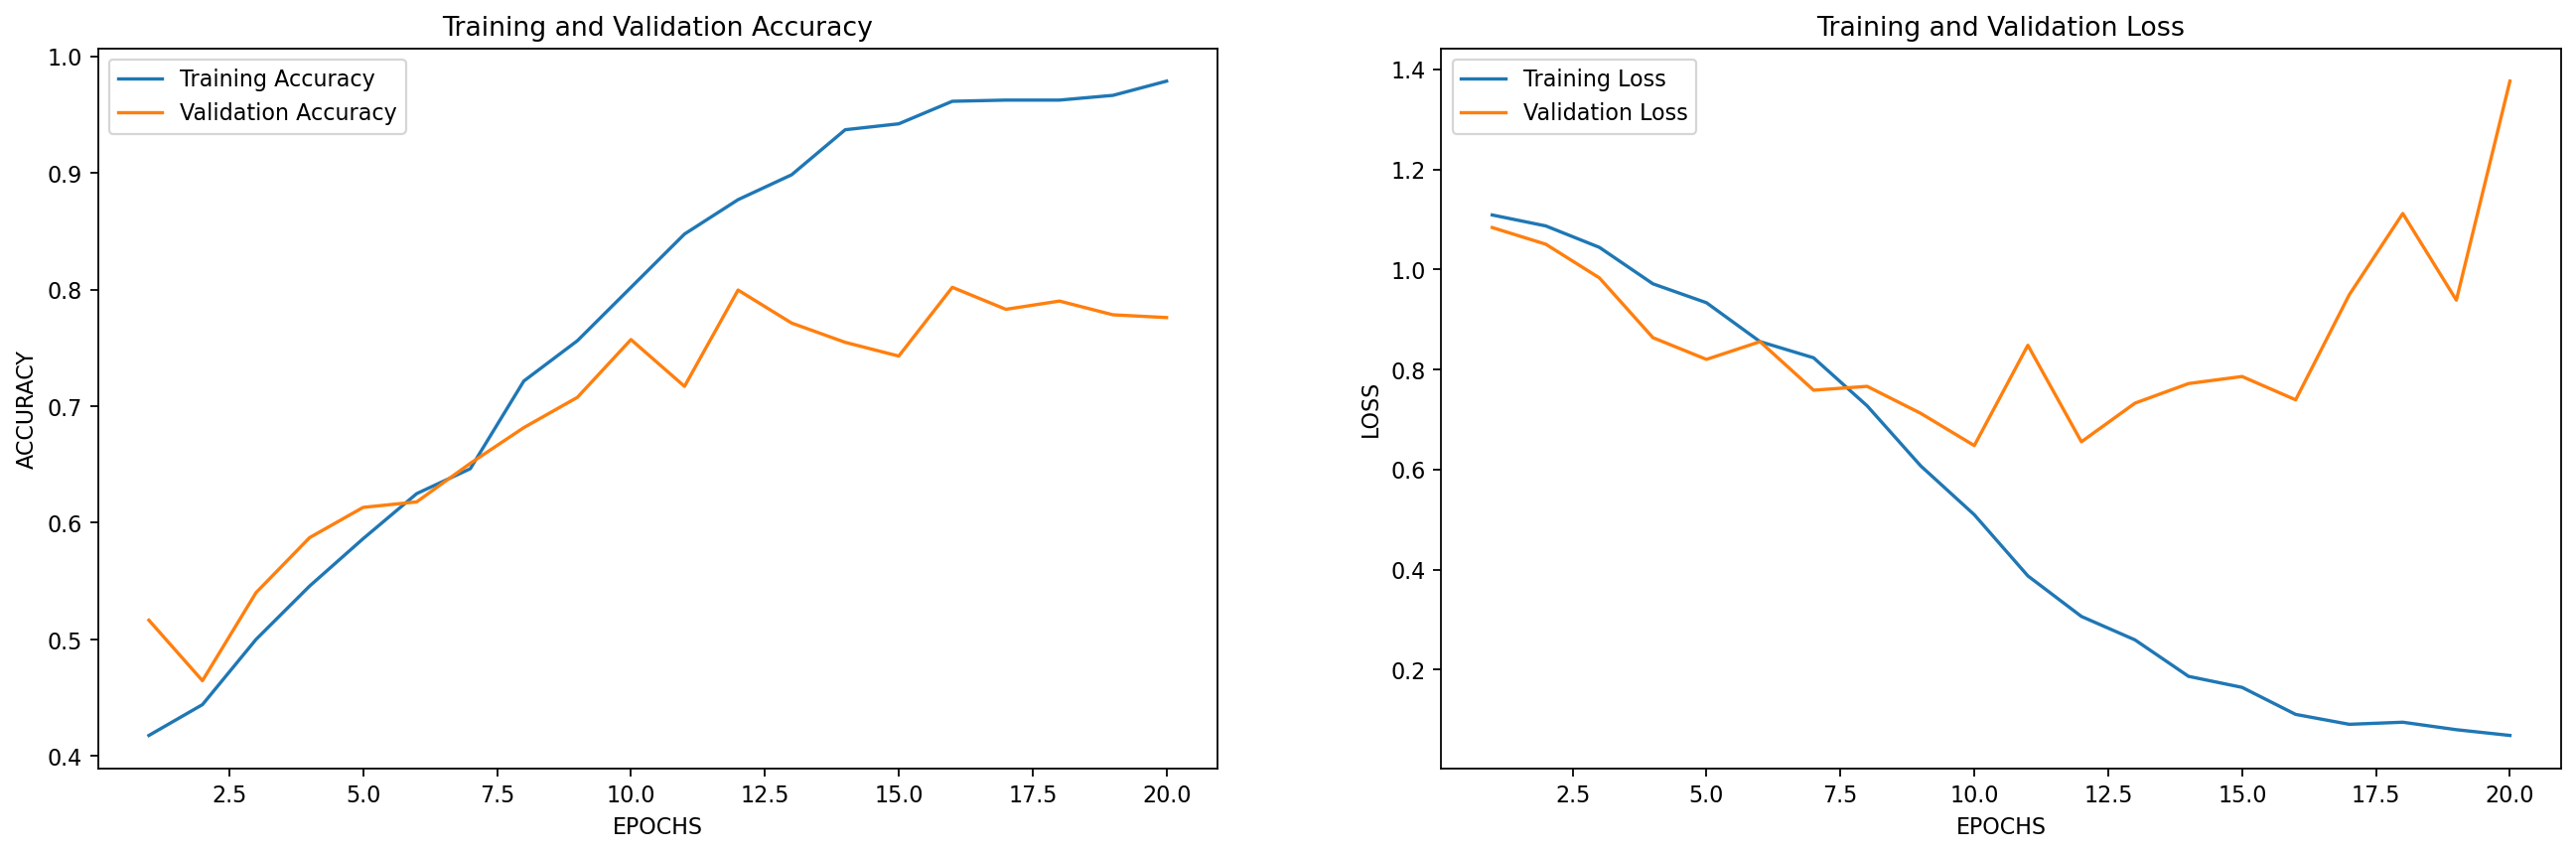

In [67]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

20/20 [==============================] - 10s 533ms/step

Evaluation Metrics:

Balanced Accuracy : 0.71
Precision : 0.74
Recall : 0.75
F1 Score: 0.74
ROC AUC Score : 0.91

Classification report : 
               precision    recall  f1-score   support

      Healthy       0.83      0.94      0.88        72
 Partial Tear       0.66      0.56      0.60        52
Complete Tear       0.68      0.64      0.66        33

     accuracy                           0.75       157
    macro avg       0.72      0.71      0.71       157
 weighted avg       0.74      0.75      0.74       157


Confusion Matrix : 


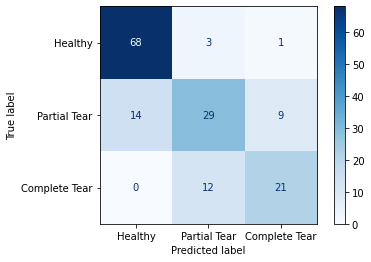

In [68]:
# Evaluate model
X_test_prob = kneeMRI_Model4.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

X_test_pred = X_test_prob.argmax(axis=-1)

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Partial Tear', 'Complete Tear'])

## KneeMRI Model 5

In [69]:
model_name = 'kneeMRI_Model5'
kneeMRI_Model5 = models.mri_model_5(model_name, len(kneemri_classes))
kneeMRI_Model5.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])
kneeMRI_Model5.summary()

Model: "kneeMRI_Model5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_30 (Conv3D)          (None, 30, 256, 256, 16)  448       
                                                                 
 max_pooling3d_27 (MaxPoolin  (None, 15, 128, 128, 16)  0        
 g3D)                                                            
                                                                 
 conv3d_31 (Conv3D)          (None, 15, 128, 128, 16)  6928      
                                                                 
 max_pooling3d_28 (MaxPoolin  (None, 8, 64, 64, 16)    0         
 g3D)                                                            
                                                                 
 conv3d_32 (Conv3D)          (None, 8, 64, 64, 32)     13856     
                                                                 
 max_pooling3d_29 (MaxPoolin  (None, 4, 32, 32, 32) 

In [70]:
%%time
with tf.device('/device:GPU:0'):
    history = kneeMRI_Model5.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                                 steps_per_epoch=len(X_train)//BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                                 validation_steps=len(X_valid)//BATCH_SIZE, 
                                 shuffle=True,
                                 class_weight=kneemri_class_weights,
                                 verbose=1,
                                 callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
123/123 [==============================] - 51s 403ms/step - loss: 1.0995 - accuracy: 0.4004 - val_loss: 1.0983 - val_accuracy: 0.4599
Epoch 2/100
123/123 [==============================] - 47s 385ms/step - loss: 1.0984 - accuracy: 0.3953 - val_loss: 1.0985 - val_accuracy: 0.4599
Epoch 3/100
123/123 [==============================] - 47s 382ms/step - loss: 1.0990 - accuracy: 0.3648 - val_loss: 1.0987 - val_accuracy: 0.3373
Epoch 4/100
123/123 [==============================] - 47s 384ms/step - loss: 1.0982 - accuracy: 0.4116 - val_loss: 1.0982 - val_accuracy: 0.4646
Epoch 5/100
123/123 [==============================] - 47s 380ms/step - loss: 1.0985 - accuracy: 0.3608 - val_loss: 1.0986 - val_accuracy: 0.3278
Epoch 6/100
123/123 [==============================] - 47s 381ms/step - loss: 1.0991 - accuracy: 0.3608 - val_loss: 1.0818 - val_accuracy: 0.4458
Epoch 7/100
123/123 [==============================] - 47s 381ms/step - loss: 1.1001 - accuracy: 0.3374 - val_loss: 1.0982 -

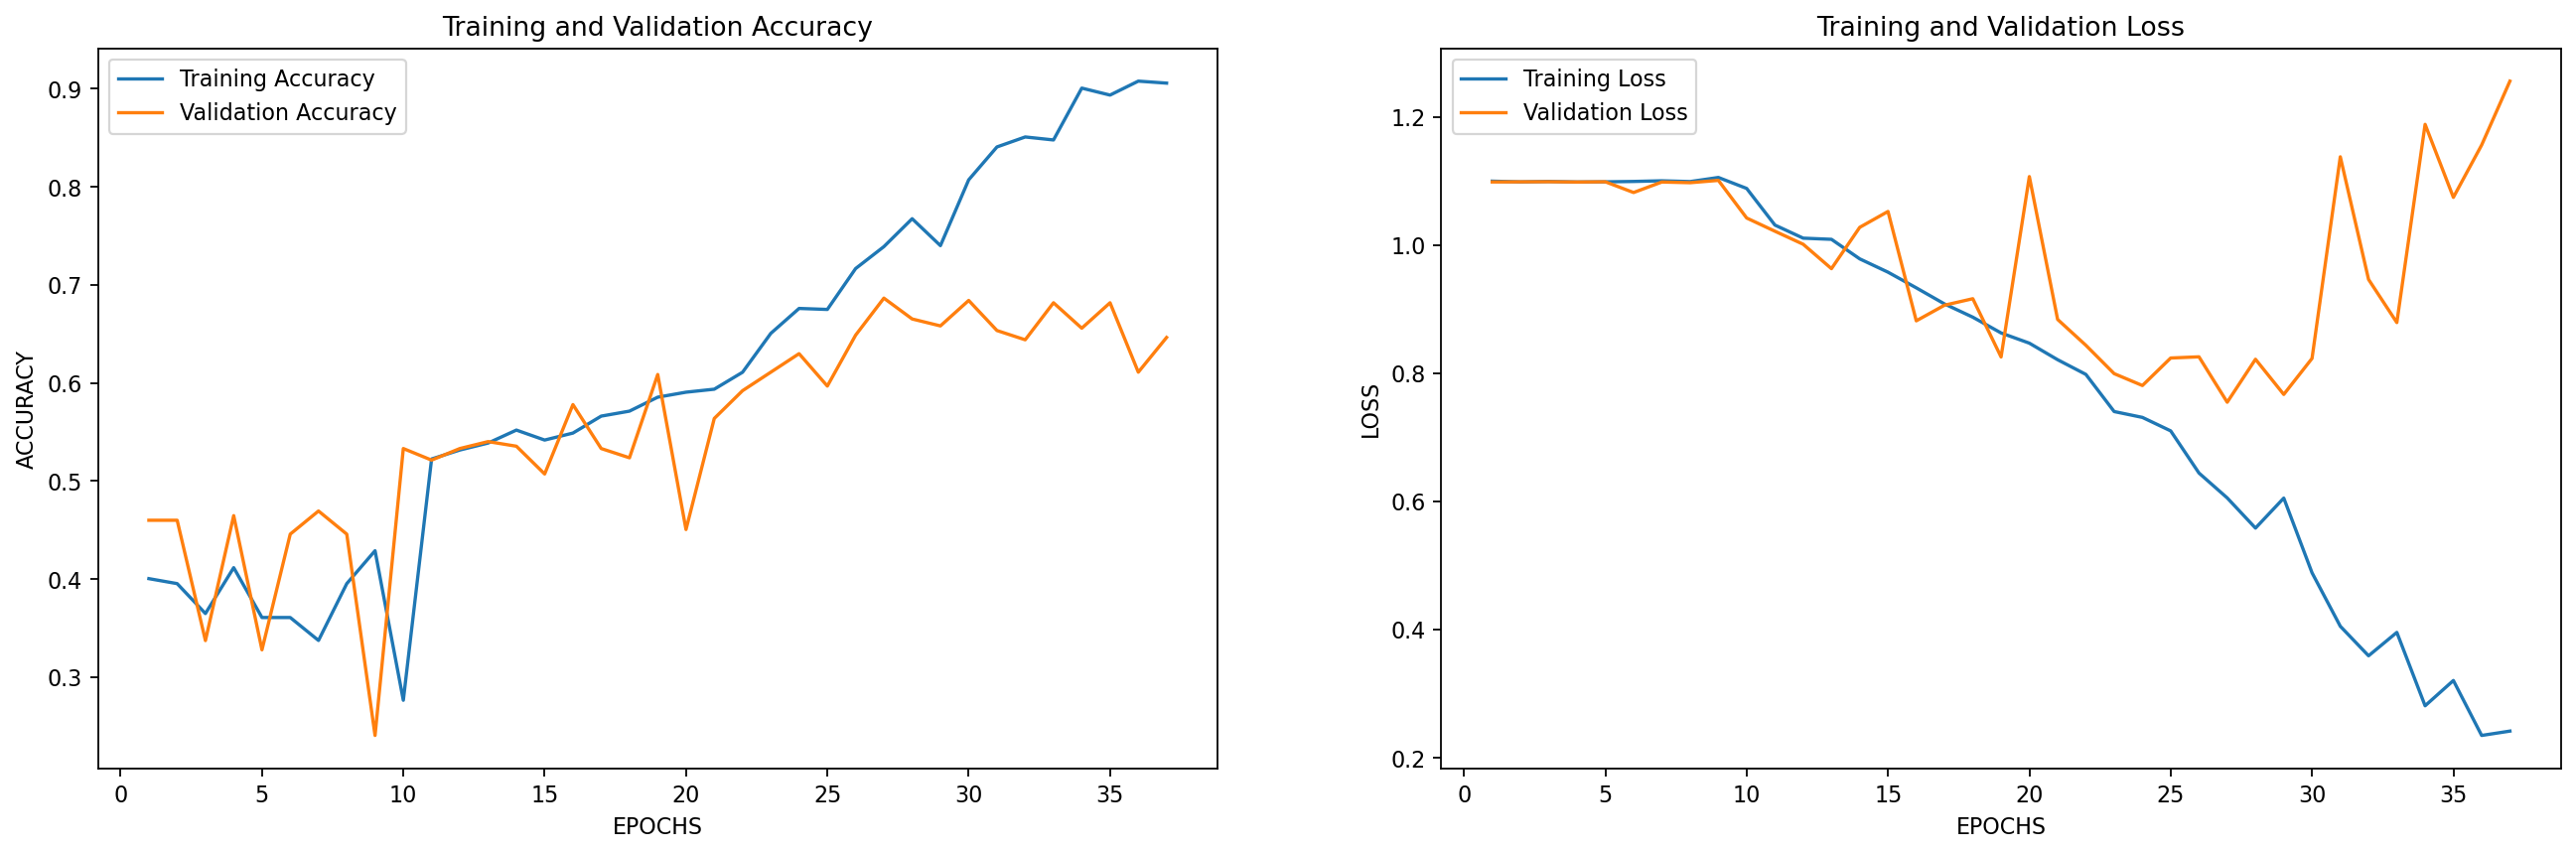

In [71]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

20/20 [==============================] - 5s 269ms/step

Evaluation Metrics:

Balanced Accuracy : 0.69
Precision : 0.73
Recall : 0.73
F1 Score: 0.73
ROC AUC Score : 0.86

Classification report : 
               precision    recall  f1-score   support

      Healthy       0.77      0.90      0.83        72
 Partial Tear       0.63      0.60      0.61        52
Complete Tear       0.79      0.58      0.67        33

     accuracy                           0.73       157
    macro avg       0.73      0.69      0.70       157
 weighted avg       0.73      0.73      0.73       157


Confusion Matrix : 


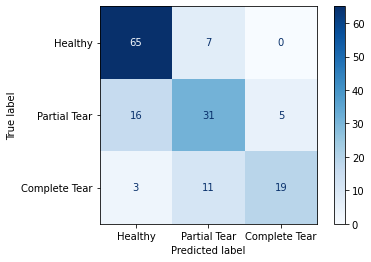

In [72]:
# Evaluate model
X_test_prob = kneeMRI_Model5.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

X_test_pred = X_test_prob.argmax(axis=-1)

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Partial Tear', 'Complete Tear'])

## KneeMRI Model 6

In [53]:
model_name = 'kneeMRI_Model6'
kneeMRI_Model6 = models.mri_model_6(model_name, len(kneemri_classes))
kneeMRI_Model6.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])
kneeMRI_Model6.summary()

Model: "kneeMRI_Model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 256, 256, 8)   224       
                                                                 
 conv3d_1 (Conv3D)           (None, 30, 256, 256, 16)  3472      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 15, 128, 128, 16)  0        
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 15, 128, 128, 16)  6928      
                                                                 
 conv3d_3 (Conv3D)           (None, 15, 128, 128, 16)  6928      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 8, 64, 64, 16)    0         
 3D)                                                

In [54]:
%%time
with tf.device('/device:GPU:0'):
    history = kneeMRI_Model6.fit(utils.batch_generator(X_train, y_train, BATCH_SIZE),
                                 steps_per_epoch=len(X_train)//BATCH_SIZE,
                                 epochs=EPOCHS,
                                 validation_data=utils.batch_generator(X_valid, y_valid, BATCH_SIZE),
                                 validation_steps=len(X_valid)//BATCH_SIZE, 
                                 shuffle=True,
                                 class_weight=kneemri_class_weights,
                                 verbose=1,
                                 callbacks=[utils.model_callback_checkpoint(model_name), utils.model_callback_earlystopping()])

Epoch 1/100
123/123 [==============================] - 80s 566ms/step - loss: 1.0993 - accuracy: 0.3892 - val_loss: 1.0990 - val_accuracy: 0.2099
Epoch 2/100
123/123 [==============================] - 64s 523ms/step - loss: 1.0206 - accuracy: 0.5071 - val_loss: 1.0834 - val_accuracy: 0.4693
Epoch 3/100
123/123 [==============================] - 65s 526ms/step - loss: 0.9292 - accuracy: 0.5620 - val_loss: 1.0338 - val_accuracy: 0.5519
Epoch 4/100
123/123 [==============================] - 65s 527ms/step - loss: 0.8873 - accuracy: 0.5711 - val_loss: 1.0012 - val_accuracy: 0.4764
Epoch 5/100
123/123 [==============================] - 65s 526ms/step - loss: 0.8395 - accuracy: 0.5843 - val_loss: 1.0153 - val_accuracy: 0.5236
Epoch 6/100
123/123 [==============================] - 65s 529ms/step - loss: 0.7936 - accuracy: 0.6128 - val_loss: 0.8983 - val_accuracy: 0.5425
Epoch 7/100
123/123 [==============================] - 65s 526ms/step - loss: 0.7179 - accuracy: 0.6474 - val_loss: 1.3744 -

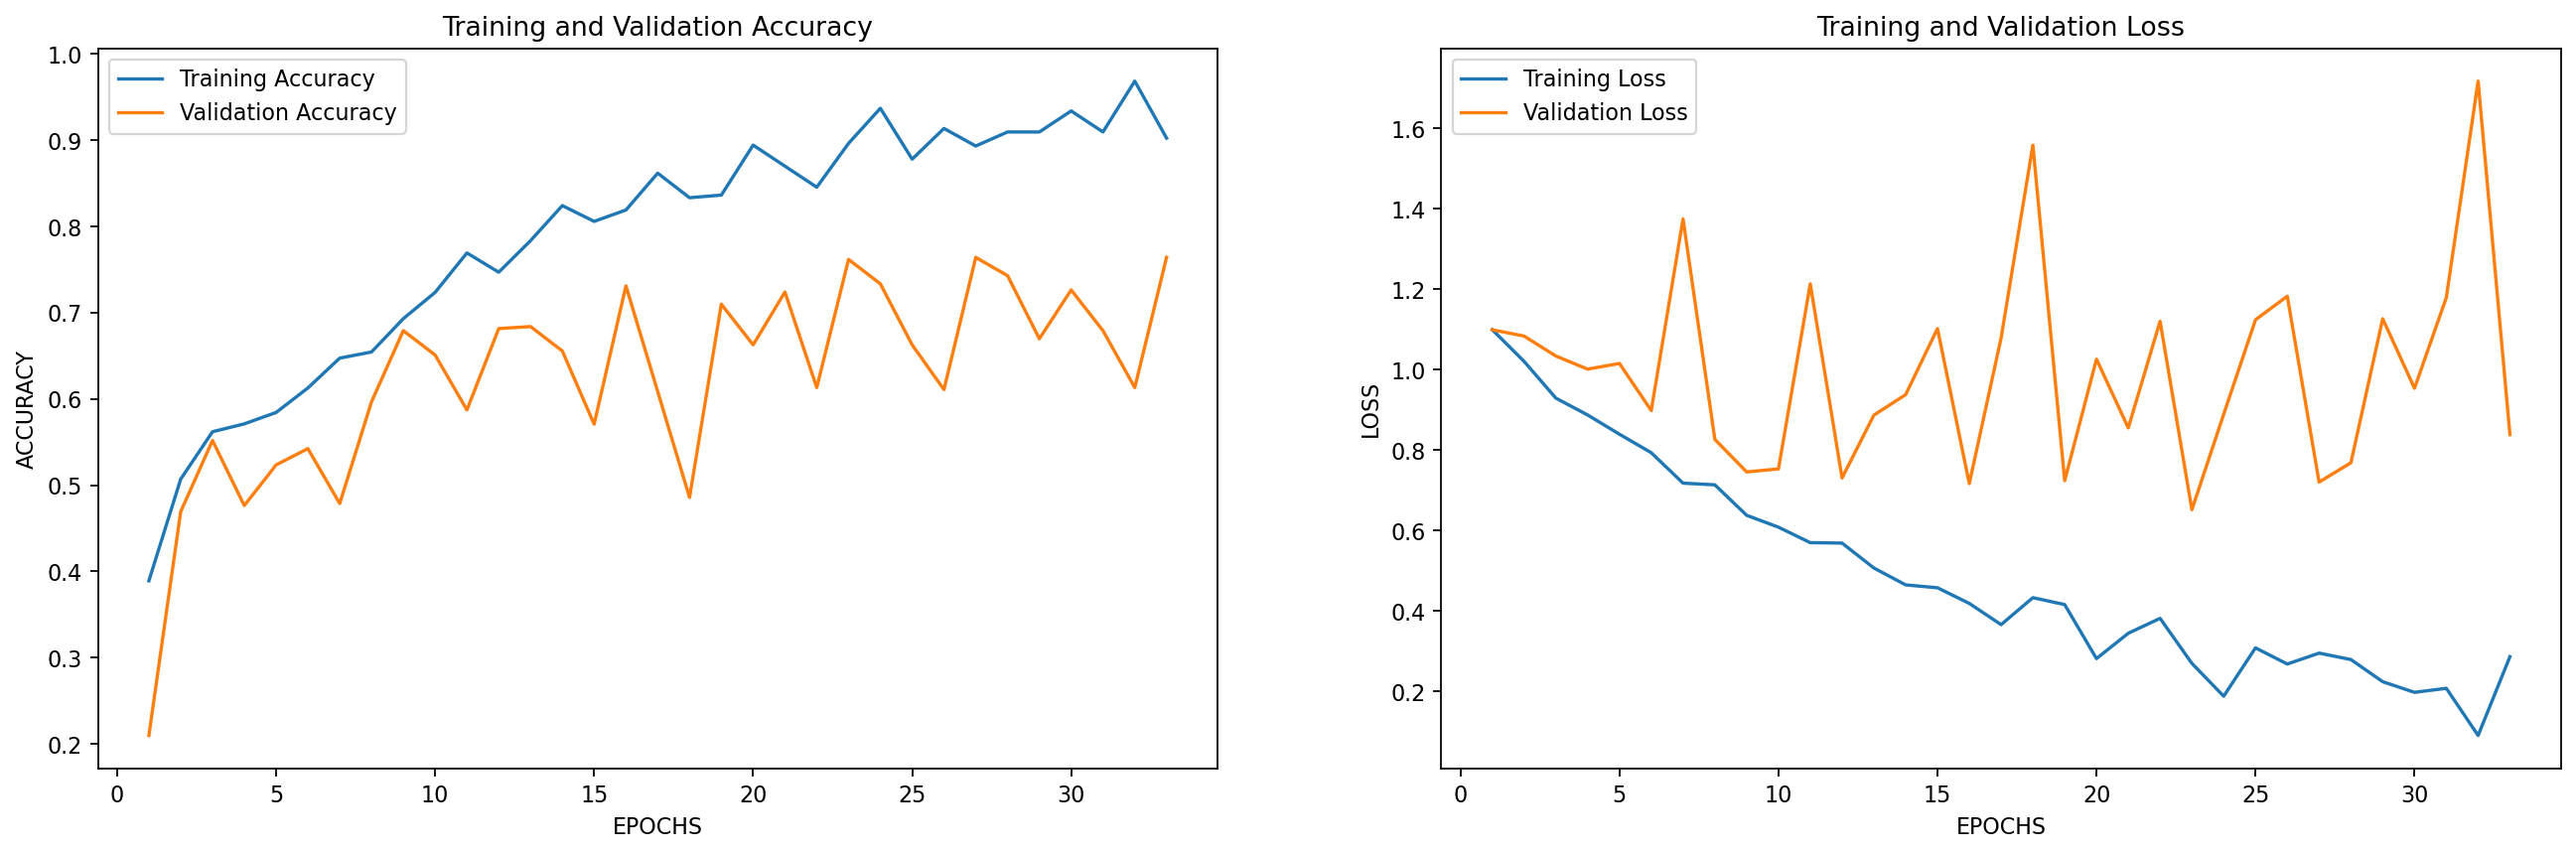

In [55]:
# Store history
utils.store_model_history(model_name, history.history)

# Plot training graphs
utils.plot_acc_loss(history.history)

In [56]:
kneeMRI_Model6 = utils.load_model_from_disk('kneeMRI_Model6')

20/20 [==============================] - 10s 525ms/step

Evaluation Metrics:

Balanced Accuracy : 0.81
Precision : 0.82
Recall : 0.81
F1 Score: 0.81
ROC AUC Score : 0.92

Classification report : 
               precision    recall  f1-score   support

      Healthy       0.87      0.81      0.83        72
 Partial Tear       0.69      0.81      0.74        52
Complete Tear       0.93      0.82      0.87        33

     accuracy                           0.81       157
    macro avg       0.83      0.81      0.82       157
 weighted avg       0.82      0.81      0.81       157


Confusion Matrix : 


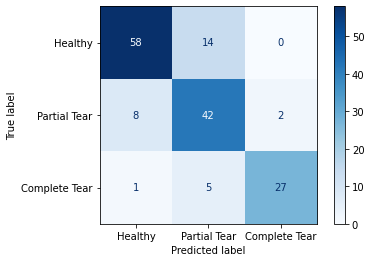

In [56]:
# Evaluate model
X_test_prob = kneeMRI_Model6.predict(utils.predict_batch_generator(X_test, BATCH_SIZE))

X_test_pred = X_test_prob.argmax(axis=-1)

utils.evaluate_model(y_test, X_test_pred.tolist(), X_test_prob.tolist(), ['Healthy', 'Partial Tear', 'Complete Tear'])

## Example of Training on GPU vs CPU

In [58]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense

In [59]:
model = Sequential([
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(30, 256, 256, 1)),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Three classes: 0, 1, 2
], name='Trial')

In [60]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=utils.model_lr_schedule()), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "Trial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_18 (Conv3D)          (None, 28, 254, 254, 32)  896       
                                                                 
 max_pooling3d_14 (MaxPoolin  (None, 14, 127, 127, 32)  0        
 g3D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7225792)           0         
                                                                 
 dense_4 (Dense)             (None, 64)                462450752 
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 462,451,843
Trainable params: 462,451,843
Non-trainable params: 0
_______________________________________________

In [62]:
X_train_temp = X_train[:128]
y_train_temp = y_train[:128]
X_valid_temp = X_test[:32]
y_valid_temp = y_test[:32]
class_weights_temp = utils.compute_class_weights(y_train_temp)

## On GPU

In [65]:
%%time
with tf.device('/device:GPU:0'):
    history = model.fit(utils.batch_generator(X_train_temp, y_train_temp, BATCH_SIZE),
                        steps_per_epoch=len(X_train_temp)//BATCH_SIZE,
                        epochs=5,
                        validation_data=utils.batch_generator(X_valid_temp, y_valid_temp, BATCH_SIZE),
                        validation_steps=len(X_valid_temp)//BATCH_SIZE, 
                        shuffle=True,
                        class_weight=class_weights_temp,
                        verbose=1,
                        callbacks=[utils.model_callback_checkpoint('CPUvsGPU'), utils.model_callback_earlystopping()])

Epoch 1/5
16/16 [==============================] - 21s 1s/step - loss: 51.4816 - accuracy: 0.4453 - val_loss: 20.8152 - val_accuracy: 0.5625
Epoch 2/5
16/16 [==============================] - 18s 1s/step - loss: 16.5783 - accuracy: 0.6250 - val_loss: 9.4362 - val_accuracy: 0.6562
Epoch 3/5
16/16 [==============================] - 18s 1s/step - loss: 7.3881 - accuracy: 0.7031 - val_loss: 3.6138 - val_accuracy: 0.7188
Epoch 4/5
16/16 [==============================] - 6s 361ms/step - loss: 2.4683 - accuracy: 0.8047 - val_loss: 4.9877 - val_accuracy: 0.6250
Epoch 5/5
16/16 [==============================] - 6s 358ms/step - loss: 0.5582 - accuracy: 0.9219 - val_loss: 4.6749 - val_accuracy: 0.6875
Wall time: 1min 8s


## On CPU

In [66]:
%%time
with tf.device('/device:CPU:0'):
    history = model.fit(utils.batch_generator(X_train_temp, y_train_temp, BATCH_SIZE),
                        steps_per_epoch=len(X_train_temp)//BATCH_SIZE,
                        epochs=5,
                        validation_data=utils.batch_generator(X_valid_temp, y_valid_temp, BATCH_SIZE),
                        validation_steps=len(X_valid_temp)//BATCH_SIZE, 
                        shuffle=True,
                        class_weight=class_weights_temp,
                        verbose=1,
                        callbacks=[utils.model_callback_checkpoint('CPUvsGPU'), utils.model_callback_earlystopping()])

Epoch 1/5
16/16 [==============================] - 386s 24s/step - loss: 1.0875 - accuracy: 0.9297 - val_loss: 6.0008 - val_accuracy: 0.7188
Epoch 2/5
16/16 [==============================] - 369s 23s/step - loss: 0.3787 - accuracy: 0.9375 - val_loss: 7.2662 - val_accuracy: 0.5625
Epoch 3/5
16/16 [==============================] - 381s 24s/step - loss: 0.1403 - accuracy: 0.9766 - val_loss: 4.1612 - val_accuracy: 0.7812
Epoch 4/5
16/16 [==============================] - 370s 23s/step - loss: 0.4838 - accuracy: 0.9219 - val_loss: 9.6759 - val_accuracy: 0.5938
Epoch 5/5
16/16 [==============================] - 381s 24s/step - loss: 0.4018 - accuracy: 0.9453 - val_loss: 2.7049 - val_accuracy: 0.7812
Wall time: 31min 28s
